# defining a database

Here we aim at defining a database of faces which are looking either at the left, to the centre or to the right of the screen. This will be used for further supervised learning.


In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## a minimalistic stimulation within the notebook


Instead of using an external program to show stimuli, we will use a minimalist solution within the notebook. This will consist of chains of characters that we really display into segments:

In [22]:
targets = {}
s_target = '🔴'
s_distra = '🔵'
s_target_bis = '🔵'
s_distra = '🌫'
s_blink = '☠️'

N_dis = 24
N_margin = 2

targets['left'] = N_margin * s_distra + s_target + 2 * N_dis * s_distra + N_margin * s_distra

targets['blink'] = N_margin * s_distra + N_dis * s_distra + s_blink + N_dis * s_distra + N_margin * s_distra

targets['center'] = N_margin * s_distra + N_dis * s_distra + s_target + N_dis * s_distra + N_margin * s_distra

targets['right'] = N_margin * s_distra + 2 * N_dis * s_distra + s_target + N_margin * s_distra

print ('Empty line')
null = N_margin * s_distra +  (2 * N_dis + 1) * s_distra + N_margin * s_distra
print (null)
print ('Fixation dot')
center = N_margin * s_distra + N_dis * s_distra + s_target_bis + N_dis * s_distra + N_margin * s_distra
print (center)

for label in targets.keys():
    print('label=', label)
    print (targets[label])

Empty line
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Fixation dot
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔵🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= left
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= blink
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫☠️🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= center
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= right
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫


Let's now use a trick in jupyter notebooks to show then hide a text area:
https://stackoverflow.com/questions/42782902/clear-widget-area-of-a-cell-in-a-jupyter-notebook-from-within-notebook


In [23]:
import time

from IPython.display import clear_output
for i in range(10)[::-1]:
    clear_output()
    if i>0:
        if i % 2 :
            print('⌛️Countdown', i)
        else:
            print('⏳Countdown', i)

    else:
        print('🚀 Lift-off !')
    time.sleep(1)

🚀 Lift-off !


We will now draw a random sequence of left, center and right:

In [25]:
import numpy as np
N_category = len(targets.keys())

for i in range(25):

    i_choice = np.random.randint(N_category)
    label = list(targets.keys())[i_choice]
    print('i_choice', i_choice, ', label', label)


i_choice 0 , label left
i_choice 2 , label center
i_choice 0 , label left
i_choice 2 , label center
i_choice 1 , label blink
i_choice 0 , label left
i_choice 1 , label blink
i_choice 1 , label blink
i_choice 1 , label blink
i_choice 3 , label right
i_choice 0 , label left
i_choice 1 , label blink
i_choice 3 , label right
i_choice 3 , label right
i_choice 3 , label right
i_choice 3 , label right
i_choice 3 , label right
i_choice 0 , label left
i_choice 3 , label right
i_choice 0 , label left
i_choice 1 , label blink
i_choice 2 , label center
i_choice 3 , label right
i_choice 0 , label left
i_choice 3 , label right


Finally, this implements a minimalistic stimulation software in a few lines of code:

In [37]:
N_frame = 10
for i in range(N_frame):
    clear_output()
    #print('frame', i, '/', N_frame)
    i_choice = np.random.randint(N_category)
    label = list(targets.keys())[i_choice]
    print(null)
    print(targets[label])
    print(null)

    time.sleep(1)


🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫


## detect the upper half face : full frame from the webcam

Let's grab some frames, detect your head, then crop the left side in order to save it as a database for further learning.

Let's grab some frames. During that time, I recommend to:
- not move the head (I hold them in my hands) and to look at the led of your webcam,
- when it's lit, move your eyes evenly on the screen (try to avoid moving eyebrows or to do sacaddes).

First, if you have not done so already, install ``LeCheapEyeTracker`` (you will need ``opencv`` installed too). This is what I use:

Let's grab a full frame:

In [42]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

N_frame = 4
import time
time.sleep(1.)
et = Server()
print ('Time', et.clock())
img0 = et.cam.grab()

H, W, three = img0.shape
movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)

for i in range(N_frame):                
    print('frame', i)
    movie[:, :, :, i] = et.cam.grab()
    time.sleep(0.3)
    
img = et.cam.grab()
et.close()


Time 1032722.335508067
frame 0
frame 1
frame 2
frame 3
Capture released


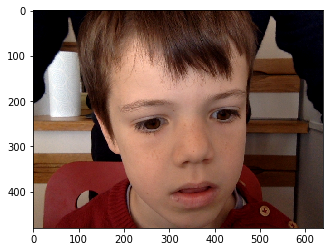

In [43]:
plt.imshow(movie[:, :, ::-1, 0])

This is just a bunch of pixels:

In [44]:
movie[100, 307, :, 0]

array([67, 70, 97], dtype=uint8)

## detect the upper half face

Let's grab some frames, detect your head, then crop the left side in order to save it as a database for further learning.

Let's grab some frames. During that time, I recommend to:
- not move the head (I hold them in my hands) and to look at the led of your webcam,
- when it's lit, move your eyes evenly on the screen (try to avoid moving eyebrows or to do sacaddes).

The library, will detect the face's position and crop the upper half:

In [47]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

N_frame = 4
import time
time.sleep(1.)
et = Server()
print ('Time', et.clock())
img0 = et.cam.grab()
img_face, res, t0 = et.process_frame(img0, et.clock())

H, W, three = img_face.shape
for i in range(N_frame):
    print('frame', i)

    frame = et.cam.grab()
    img_face, res, t0 = et.process_frame(frame, et.clock())
    time.sleep(0.3)
    
et.close()


Time 1032750.268473401
frame 0
frame 1
frame 2
frame 3
Capture released


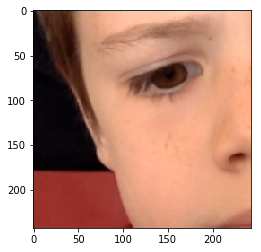

In [48]:
plt.imshow(img_face[:, :, ::-1])

## saving the frames to image files

We first create the folder hierarchy:

In [16]:
datapath = '/tmp/dataset'
datapath = '../../anaisbrgs_StageL3/dataset'
datapath = 'dataset'

In [27]:
import os
try:
    os.mkdir(datapath)
except:
    pass

for label in targets.keys():
    print('label=', label)    
    try:
        os.mkdir(os.path.join(datapath, label))
    except:
        pass


label= left
label= blink
label= center
label= right


In [28]:
!ls -lR {datapath}

total 0
drwxr-xr-x    6 laurentperrinet  wheel   192 Mar 22 09:59 blink
drwxr-xr-x  109 laurentperrinet  wheel  3488 Mar 22 09:59 center
drwxr-xr-x  116 laurentperrinet  wheel  3712 Mar 22 09:59 left
drwxr-xr-x    4 laurentperrinet  wheel   128 Mar 22 09:59 processed
drwxr-xr-x    6 laurentperrinet  wheel   192 Mar 22 09:59 raw
drwxr-xr-x  100 laurentperrinet  wheel  3200 Mar 22 09:59 right

dataset/blink:
total 360
-rwxr-xr-x  1 laurentperrinet  wheel  57834 Mar 22 09:59 Anaïs_15.png
-rwxr-xr-x  1 laurentperrinet  wheel  58192 Mar 22 09:59 Anaïs_19.png
-rwxr-xr-x  1 laurentperrinet  wheel  59505 Mar 22 09:59 Laurent_53.png

dataset/center:
total 12952
-rw-r--r--  1 laurentperrinet  wheel  61445 Mar 20 17:08 2018-03-20_Justine_0.png
-rw-r--r--  1 laurentperrinet  wheel  63830 Mar 20 17:08 2018-03-20_Justine_1.png
-rw-r--r--  1 laurentperrinet  wheel  62251 Mar 20 17:08 2018-03-20_Justine_15.png
-rw-r--r--  1 laurentperrinet  wheel  61309 Mar 20 17:08 2018-03-20_Justine_16.png
-rw-r--r-

Then use the excellent https://imageio.github.io library:

In [13]:
import imageio
print(movie[:, :, :, 0].shape)
imageio.imwrite('/tmp/screenshot.png', movie[:, :, :, 0])

(480, 640, 3)


In [14]:
subject_name='anonymous'
N_frame = 64
for i in range(N_frame):
    i_choice = np.random.randint(3)
    label = list(targets.keys())[i_choice]
    print(targets[label])

    filename = os.path.join(datapath, label, subject_name + '_' + str(i) + '.png')
    print(filename)



🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_0.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_1.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫
/tmp/dataset/right/anonymous_2.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/center/anonymous_3.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/center/anonymous_4.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_5.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_6.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫
/tmp/dataset/right/anonymous_7.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_8.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_9.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_10.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫

## wrapping things up

All the protocol in one script:

In [33]:
import imageio

from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

N_category = len(targets.keys())
def get_stack(datapath=datapath, subject_name='anonymous', N_frame=64, startup_time=1., interframe_time=1., waiting_time=.2):
    try:
        import time
        time.sleep(startup_time)
        et = Server()
        print ('Time', et.clock())
        img0 = et.cam.grab()
        img_face, res, t0 = et.process_frame(img0, et.clock())

        H, W, three = img_face.shape
        #movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)
        for i in range(N_frame):
            
            clear_output()
            # presentation of stimulus
            i_choice = np.random.randint(N_category)
            label = list(targets.keys())[i_choice]
            print(null)
            print(null)
            print(targets[label])
            print(null)
            print(null)

            time.sleep(interframe_time)

            frame = et.cam.grab()
            img_face, res, t0 = et.process_frame(frame, et.clock())

            clear_output()
            print(null)
            print(null)
            print(center)
            print(null)
            print(null)

            
            time.sleep(waiting_time)

            filename = os.path.join(datapath, label, subject_name + '_' + str(i) + '.png')
            imageio.imwrite(filename, img_face[:, :, ::-1])

    finally:
        et.close()

In [31]:
date = '2018-03-22_'

In [ ]:
get_stack(subject_name=date + 'Laurent_blinks')

In [ ]:
get_stack(subject_name=date + 'Ektor')

In [35]:
!ls -lR {datapath}

total 0
drwxr-xr-x   18 laurentperrinet  wheel   576 Mar 22 14:41 blink
drwxr-xr-x  131 laurentperrinet  wheel  4192 Mar 22 14:41 center
drwxr-xr-x  134 laurentperrinet  wheel  4288 Mar 22 14:41 left
drwxr-xr-x  112 laurentperrinet  wheel  3584 Mar 22 14:41 right

dataset/blink:
total 1768
-rw-r--r--  1 laurentperrinet  wheel  59297 Mar 22 14:40 2018-03-22_Laurent_blinks_18.png
-rw-r--r--  1 laurentperrinet  wheel  60292 Mar 22 14:40 2018-03-22_Laurent_blinks_19.png
-rw-r--r--  1 laurentperrinet  wheel  54214 Mar 22 14:40 2018-03-22_Laurent_blinks_22.png
-rw-r--r--  1 laurentperrinet  wheel  58117 Mar 22 14:40 2018-03-22_Laurent_blinks_26.png
-rw-r--r--  1 laurentperrinet  wheel  56835 Mar 22 14:40 2018-03-22_Laurent_blinks_29.png
-rw-r--r--  1 laurentperrinet  wheel  58079 Mar 22 14:40 2018-03-22_Laurent_blinks_3.png
-rw-r--r--  1 laurentperrinet  wheel  59208 Mar 22 14:40 2018-03-22_Laurent_blinks_37.png
-rw-r--r--  1 laurentperrinet  wheel  59125 Mar 22 14:41 2018-03-22_Laurent_blin